In [3]:
import sys
sys.path.append('..')
from Python3Code.Chapter3.KalmanFilters import KalmanFilters
sys.path.append('../Python3Code')
from Python3Code.Chapter3.DataTransformation import PrincipalComponentAnalysis, LowPassFilter
from Python3Code.util.VisualizeDataset import VisualizeDataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# load data
data = pd.read_csv('intermediate_datafiles/dataset.csv', index_col=0)

In [ ]:
# apply Kalman filter
kf = KalmanFilters()
data = kf.apply_kalman_filter(data, 'accelerometer_X (m/s^2)')
data = kf.apply_kalman_filter(data, 'accelerometer_Y (m/s^2)')
data = kf.apply_kalman_filter(data, 'accelerometer_Z (m/s^2)')
data = kf.apply_kalman_filter(data, 'gyroscope_X (rad/s)')
data = kf.apply_kalman_filter(data, 'gyroscope_Y (rad/s)')
data = kf.apply_kalman_filter(data, 'gyroscope_Z (rad/s)')
data = kf.apply_kalman_filter(data, 'barometer_X (hPa)')
data = kf.apply_kalman_filter(data, 'location_Velocity (m/s)')

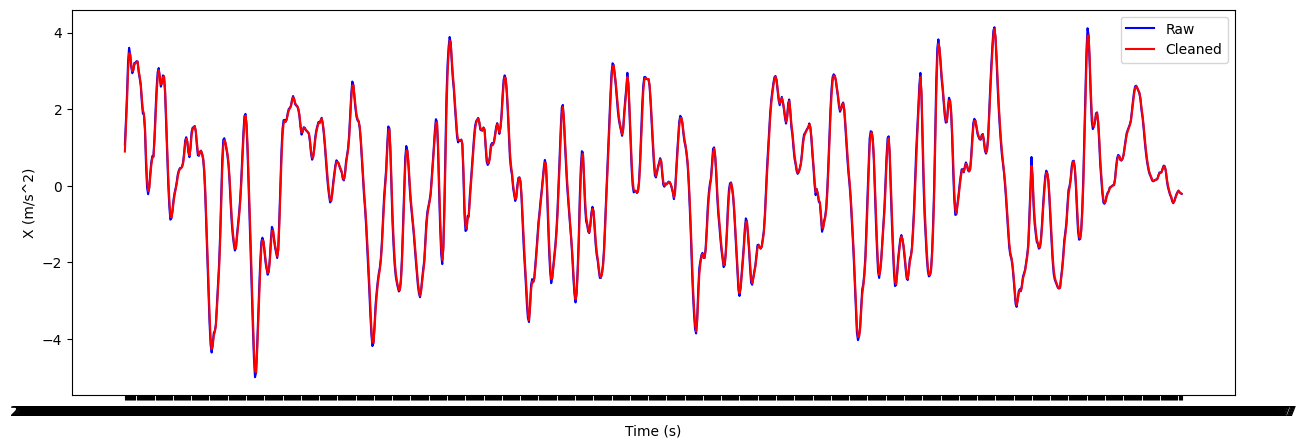

In [9]:
# plot uncleaned and cleaned data in same plot
plt.figure(figsize=(15, 5))

# indices on one baan
baan = slice(94500, 95500)

# Plotting the uncleaned data for each stroke
plt.plot(data['accelerometer_X (m/s^2)'][baan], label='Raw', color = 'blue')

# Plotting the cleaned data for each stroke
plt.plot(data['accelerometer_X (m/s^2)_kalman'][baan], label='Cleaned', color = 'red')

plt.xlabel('Time (s)')
plt.ylabel('X (m/s^2)')
plt.legend()

In [17]:
# apply low pass filter
lpf = LowPassFilter()
data = lpf.low_pass_filter(data, 'accelerometer_X (m/s^2)_kalman', 100, 10, order=20)
data = lpf.low_pass_filter(data, 'accelerometer_Y (m/s^2)_kalman', 100, 10, order=20)
data = lpf.low_pass_filter(data, 'accelerometer_Z (m/s^2)_kalman', 100, 10, order=20)
data = lpf.low_pass_filter(data, 'gyroscope_X (rad/s)_kalman', 100, 10, order=20)
data = lpf.low_pass_filter(data, 'gyroscope_Y (rad/s)_kalman', 100, 10, order=20)
data = lpf.low_pass_filter(data, 'gyroscope_Z (rad/s)_kalman', 100, 10, order=20)
data = lpf.low_pass_filter(data, 'barometer_X (hPa)_kalman', 100, 10, order=20)
data = lpf.low_pass_filter(data, 'location_Velocity (m/s)_kalman', 100, 10, order=20)

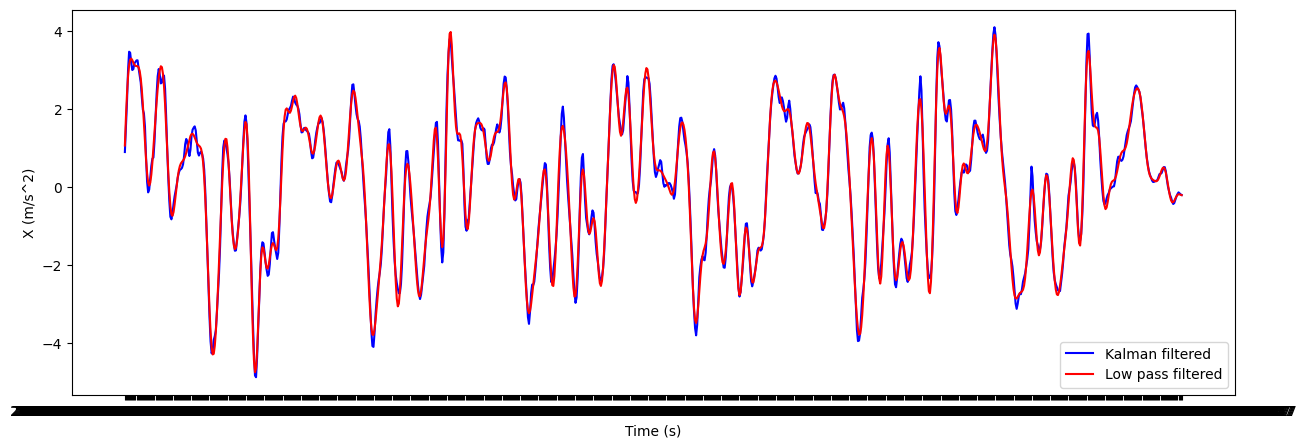

In [18]:
# plot kalman filtered and low pass filtered data in same plot
plt.figure(figsize=(15, 5))
plt.plot(data['accelerometer_X (m/s^2)_kalman'][baan], label='Kalman filtered', color='blue')
plt.plot(data['accelerometer_X (m/s^2)_kalman_lowpass'][baan], label='Low pass filtered', color='red')
plt.xlabel('Time (s)')
plt.ylabel('X (m/s^2)')
plt.legend()

In [5]:
# apply PCA
pca = PrincipalComponentAnalysis()
data = pca.apply_pca(data, ['accelerometer_X (m/s^2)_kalman_lowpass', 
                            'accelerometer_Y (m/s^2)_kalman_lowpass', 
                            'accelerometer_Z (m/s^2)_kalman_lowpass', 
                            'gyroscope_X (rad/s)_kalman_lowpass', 
                            'gyroscope_Y (rad/s)_kalman_lowpass', 
                            'gyroscope_Z (rad/s)_kalman_lowpass',
                            'barometer_X (hPa)_kalman_lowpass',
                            'location_Velocity (m/s)_kalman_lowpass'
                            ],
                            8)

In [10]:
pc_values = pca.determine_pc_explained_variance(data, ['accelerometer_X (m/s^2)_kalman_lowpass', 
                                                    'accelerometer_Y (m/s^2)_kalman_lowpass', 
                                                    'accelerometer_Z (m/s^2)_kalman_lowpass', 
                                                    'gyroscope_X (rad/s)_kalman_lowpass', 
                                                    'gyroscope_Y (rad/s)_kalman_lowpass', 
                                                    'gyroscope_Z (rad/s)_kalman_lowpass',
                                                    'barometer_X (hPa)_kalman_lowpass',
                                                    'location_Velocity (m/s)_kalman_lowpass'
                                                    ]
                                                    )

plt.plot(range(1, 9), pc_values)
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.show()
                        

: 

In [20]:
# export to csv
data.to_csv('intermediate_datafiles/cleaned_dataset.csv', index=False)